H-1B Visa Petition Analysis

Chinmay Khole-  RedID 823720476	
Ronak Bipin Thakkar-  RedID 824667630

The links of the required data files for this project are explained in detail in the Readme.PDF under section 'Links for the data to download the processed files directly:' attached along with this notebook.


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
folderPath = '/content/drive/My Drive/'
excel2015 = folderPath + 'H-1B_Disclosure_Data_FY15_Q4.xlsx'
excel2016 = folderPath + 'H-1B_Disclosure_Data_FY16.xlsx'
excel2017 = folderPath + 'H-1B_Disclosure_Data_FY17.xlsx'
excel2018 = folderPath + 'H-1B_Disclosure_Data_FY2018_EOY.xlsx'
excel2019 = folderPath + 'H-1B_Disclosure_Data_FY2019.xlsx'
csv2015 = folderPath + '2015.csv'
csv2016 = folderPath + '2016.csv'
csv2017 = folderPath + '2017.csv'
csv2018 = folderPath + '2018.csv'
csv2019 = folderPath + '2019.csv'
csvOneDF = folderPath + 'OneDF.csv'
pd.set_option('mode.chained_assignment', None)

Step 1: The data we got from the source website was an excel sheet. Pandas takes a lot of time to read the excel file and extract it to the dataframe. Also the excel file had many columns. We decided to work on a few columns. So, in this step we read the excel file, added year column for year wise analysis and only selected the columns that we want and saved it to csv format as pandas reads csv far more quickly than excel. (On local machine took 12 min. to read one excel file so for 5 such excel files it takes a lot of time and Google Collab took some 8-9 mins per file). If you want to skip this, you can directly refer to the csv files shared with this. 

In [0]:
df=pd.read_excel(excel2015)
df[['WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO']] = df.WAGE_RATE_OF_PAY.str.split('-',n=1,expand=True) 
df['Year']='2015'
df = df.rename(columns={'H-1B_DEPENDENT': 'H1B_DEPENDENT','WILLFUL VIOLATOR':'WILLFUL_VIOLATOR'})
df=df[['CASE_NUMBER','CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','JOB_TITLE','SOC_CODE','SOC_NAME','FULL_TIME_POSITION','PREVAILING_WAGE','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','H1B_DEPENDENT','WILLFUL_VIOLATOR','Year']]
df.to_csv(csv2015,index=False)

In [0]:
df=pd.read_excel(excel2016)
df['Year']='2016'
df = df.rename(columns={'H-1B_DEPENDENT': 'H1B_DEPENDENT'})
df=df[['CASE_NUMBER','CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','JOB_TITLE','SOC_CODE','SOC_NAME','FULL_TIME_POSITION','PREVAILING_WAGE','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','H1B_DEPENDENT','WILLFUL_VIOLATOR','Year']]
df.to_csv(csv2016,index=False)

In [0]:
df=pd.read_excel(excel2017)
df['Year']='2017'
df=df[['CASE_NUMBER','CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','JOB_TITLE','SOC_CODE','SOC_NAME','FULL_TIME_POSITION','PREVAILING_WAGE','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','H1B_DEPENDENT','WILLFUL_VIOLATOR','Year']]
df.to_csv(csv2017,index=False)

In [0]:
df=pd.read_excel(excel2018)
df['Year']='2018'
df=df[['CASE_NUMBER','CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','JOB_TITLE','SOC_CODE','SOC_NAME','FULL_TIME_POSITION','PREVAILING_WAGE','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','H1B_DEPENDENT','WILLFUL_VIOLATOR','Year']]
df.to_csv(csv2018,index=False)

In [0]:
df=pd.read_excel(excel2019)
df['Year']='2019'
df = df.rename(columns={'H-1B_DEPENDENT': 'H1B_DEPENDENT','PREVAILING_WAGE_1':'PREVAILING_WAGE','WAGE_RATE_OF_PAY_FROM_1':'WAGE_RATE_OF_PAY_FROM',
                        'WAGE_RATE_OF_PAY_TO_1':'WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY_1':'WAGE_UNIT_OF_PAY','SOC_TITLE':'SOC_NAME'})
df=df[['CASE_NUMBER','CASE_STATUS','VISA_CLASS','EMPLOYER_NAME','EMPLOYER_CITY','EMPLOYER_STATE','JOB_TITLE','SOC_CODE','SOC_NAME','FULL_TIME_POSITION','PREVAILING_WAGE','WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO','WAGE_UNIT_OF_PAY','H1B_DEPENDENT','WILLFUL_VIOLATOR','Year']]
df.to_csv(csv2019,index=False)

Step 2: Concatenated and created all the separate csv files of multiple years into one single dataframe for analysis. However, as the data we were dealing with is raw, there were many discrepancies in the data. Like one of the examples the column WAGE_UNIT_OF_PAY specifies the unit of data i.e. hourly, weekly, biweekly, monthly, Yearly for the columns “WAGE_RATE_OF_PAY_FROM” and “WAGE_RATE_OF_PAY_TO”. We created 2 new columns to store the range data on the yearly basis to make it consistent and easy to work on and later dropped the old columns. As we were focused on working on the visa Class H1B, we filtered out the other visa class from the file like “E-3 Australian”, “H-1B1 Chile”  etc. and we Concatenated all the files. This cleaner dataframe we saved into a separate csv file named OneDF.csv.

In [0]:
df_2015=pd.read_csv(csv2015, low_memory=False)
df_2016=pd.read_csv(csv2016, low_memory=False)
df_2017=pd.read_csv(csv2017, low_memory=False)
df_2018=pd.read_csv(csv2018, low_memory=False)
df_2019=pd.read_csv(csv2019, low_memory=False)

In [0]:
df_1=pd.concat([df_2015,df_2016],axis=0,sort=False)
df_2=pd.concat([df_1,df_2017],axis=0,sort=False)
df_3=pd.concat([df_2,df_2018],axis=0,sort=False)
df_4=pd.concat([df_3,df_2019],axis=0,sort=False)

In [0]:
yearly = df_4[df_4['WAGE_UNIT_OF_PAY'] == 'Year']
monthly = df_4[df_4['WAGE_UNIT_OF_PAY'] == 'Month']
biweekly= df_4[df_4['WAGE_UNIT_OF_PAY'] == 'Bi-Weekly']
weekly= df_4[df_4['WAGE_UNIT_OF_PAY'] == 'Week']
hourly= df_4[df_4['WAGE_UNIT_OF_PAY'] == 'Hour']

In [0]:
monthly['WAGE_FROM']=monthly['WAGE_RATE_OF_PAY_FROM']*12      #monthly to yearly
monthly['WAGE_TO']=monthly['WAGE_RATE_OF_PAY_TO']*12  
biweekly['WAGE_FROM']=biweekly['WAGE_RATE_OF_PAY_FROM']*24   #biweekly to yearly
biweekly['WAGE_TO']=biweekly['WAGE_RATE_OF_PAY_TO']*24         
weekly['WAGE_FROM']=weekly['WAGE_RATE_OF_PAY_FROM']*48         #Weekly to yearly
weekly['WAGE_TO']=weekly['WAGE_RATE_OF_PAY_TO']*48     
hourly['WAGE_FROM']=hourly['WAGE_RATE_OF_PAY_FROM']*1920       #hourly to yearly
hourly['WAGE_TO']=hourly['WAGE_RATE_OF_PAY_TO']*1920

In [0]:
df_11=pd.concat([yearly,monthly],axis=0,sort=False)
df_12=pd.concat([df_11,biweekly],axis=0,sort=False)
df_13=pd.concat([df_12,weekly],axis=0,sort=False)
df_14=pd.concat([df_13,hourly],axis=0,sort=False)

In [0]:
df_14=df_14.drop(columns=['WAGE_RATE_OF_PAY_FROM','WAGE_RATE_OF_PAY_TO'],axis=1)
H1B_data=df_14[df_14.VISA_CLASS == 'H-1B']
H1B_data.to_csv(csvOneDF,index=False)

Exploratory Analysis

In [0]:
mainDF=pd.read_csv(csvOneDF, low_memory=False)

1. Application distribution per year for all case status.

Year
2015    605774
2016    633935
2017    610296
2018    639507
2019    649076
Name: CASE_STATUS, dtype: int64


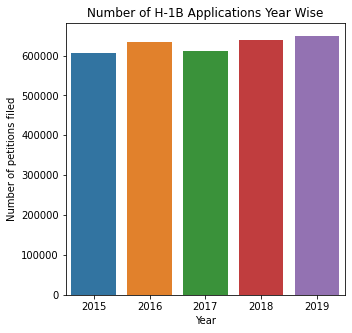

In [19]:
year = mainDF.groupby(['Year']).count()['CASE_STATUS']
print(year)
plt.figure(figsize=(5, 5))
sns.barplot(x=year.index, y=year.values)
plt.title('Number of H-1B Applications Year Wise')
plt.xlabel('Year')
plt.ylabel('Number of petitions filed')
plt.show()

More or less we are seeing a general trend of around 600,000 petitions every year. Apparently in the year 2017 we saw a fall in the number of petitions by around 24000 as compared to 2016 data, co-incidently that was the Year President Donald Trump took the charge after getting elected. The number again regained the growth pace in the next year i.e. 2018.

2. Application distribution per year case wise

In [21]:
selectedStates = mainDF.groupby(['Year','CASE_STATUS']).count()['CASE_NUMBER']
selectedStates


Year  CASE_STATUS        
2015  CERTIFIED              536693
      CERTIFIED-WITHDRAWN     40368
      DENIED                   9690
      WITHDRAWN               19023
2016  CERTIFIED              558014
      CERTIFIED-WITHDRAWN     46294
      DENIED                   8201
      WITHDRAWN               21426
2017  CERTIFIED              533621
      CERTIFIED-WITHDRAWN     48880
      DENIED                   7478
      WITHDRAWN               20317
2018  CERTIFIED              567011
      CERTIFIED-WITHDRAWN     44145
      DENIED                   7528
      WITHDRAWN               20823
2019  CERTIFIED              578639
      CERTIFIED-WITHDRAWN     46050
      DENIED                   5163
      WITHDRAWN               19224
Name: CASE_NUMBER, dtype: int64

As we thought before, the certification rate might decrease after 2016 elections. But, the data doesn't support our assumption and the routine trend of cases getting certified is seen.

3. Total petitions filed grouped by states. Table and a bar plot.

EMPLOYER_STATE
AK       467
AL      6967
AR     12494
AS         1
AZ     20719
CA    525504
CO     19433
CT     30828
DC     10457
DE     12184
FL     85921
FM         1
GA     84767
GU      1722
HI      1655
IA     10622
ID      3185
IL    196260
IN     16448
KS      9912
KY     11926
LA      7025
MA    116301
MD    109458
ME      2286
MI    125633
MN     23664
MO     26182
MP       988
MS      2644
MT       514
NC     92929
ND      1859
NE      8852
NH      5710
NJ    413337
NM      3911
NV      5280
NY    214526
OH     47271
OK      5611
OR      8772
PA    138010
PR      1297
PW         3
RI      5491
SC      8203
SD      1234
TN     23646
TX    450048
UT      9491
VA     97543
VI       256
VT      2329
WA     95806
WI     18257
WV      1933
WY       691
Name: CASE_STATUS, dtype: int64


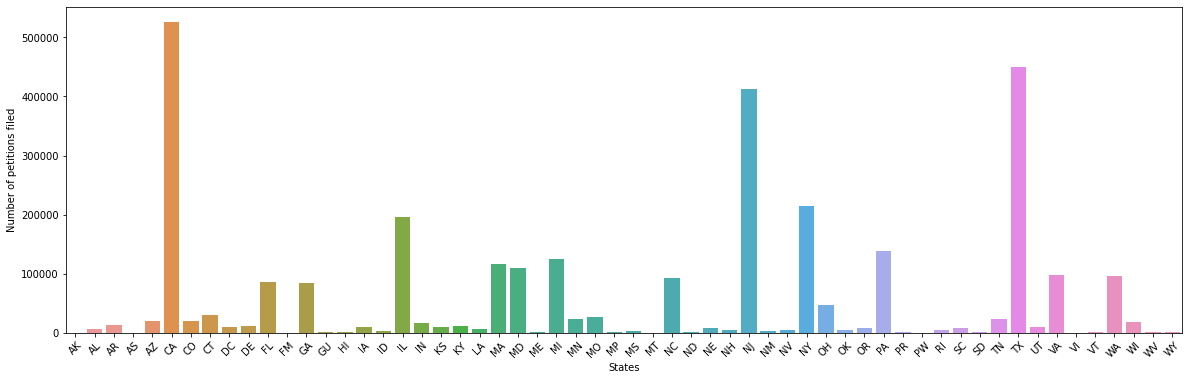

In [22]:
states = mainDF.groupby(['EMPLOYER_STATE']).count()['CASE_STATUS']
print(states)
plt.figure(figsize=(20, 6))
sns.barplot(x=states.index, y=states.values)
plt.xlabel('States')
plt.ylabel('Number of petitions filed')
plt.xticks(rotation='45')
plt.show()

In continuation to the above analysis, let us also look at the states which have filed more than 150,000 applications in the last five years cumulative and check their petition trend yearly, to identify if is there any sudden increase or drop of the applications. If there is a sudden increase in the petitions, there might be a possibility of sudden industrialization in that state and vice versa.

EMPLOYER_STATE  Year
CA              2015     96935
                2016    101365
                2017    101958
                2018    109316
                2019    115930
IL              2015     35949
                2016     41556
                2017     40815
                2018     38683
                2019     39257
NJ              2015     87170
                2016     87117
                2017     75411
                2018     83345
                2019     80294
NY              2015     40247
                2016     50648
                2017     40417
                2018     42024
                2019     41190
TX              2015     91544
                2016     93666
                2017     86730
                2018     78993
                2019     99115
Name: CASE_NUMBER, dtype: int64


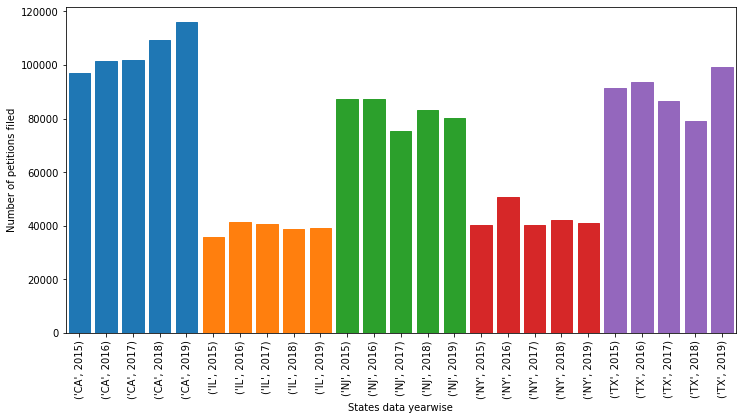

In [23]:
statesValues = states[states.values > 150000]
stateList = [] 
stateList = statesValues.index
selectedStates = mainDF[(mainDF['EMPLOYER_STATE'].isin(stateList))].groupby(['EMPLOYER_STATE','Year']).count()['CASE_NUMBER']
print(selectedStates)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=selectedStates.index, y=selectedStates.values)
for i, bar in enumerate(ax.patches):
    bar.set_color("C{}".format(int(i/5)))
plt.xlabel('States data yearwise')
plt.ylabel('Number of petitions filed')
plt.xticks(rotation='90')
plt.show()

In the above bar charts, we are not seeing any remarkable changes except for a  few things that we noticed are 
1) The states of California, Texas and New Jersey are the top 3 states in terms of applications. 
2) In the year 2017 and 2018 the number of petitions done from the state of Texas had fallen, however it regained nearly the same strength by 2019.
3) The number of petitions for the State of California are increasing every year, indicating California being an obvious choice of the employers.

4. Identifying the CERTIFIED and DENIED cases for these states. (For the states with applications more than 150k).

EMPLOYER_STATE  CASE_STATUS
CA              CERTIFIED      458173
                DENIED           7114
IL              CERTIFIED      176764
                DENIED           1883
NJ              CERTIFIED      373341
                DENIED           3128
NY              CERTIFIED      187021
                DENIED           3697
TX              CERTIFIED      406826
                DENIED           3578
Name: CASE_NUMBER, dtype: int64


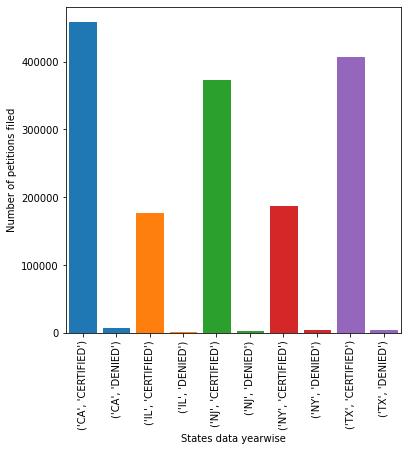

In [24]:
statesValues = states[states.values > 150000]
stateList = [] 
stateList = statesValues.index
selectedStates = mainDF[(mainDF['EMPLOYER_STATE'].isin(stateList)) & ((mainDF['CASE_STATUS'] == 'CERTIFIED') | (mainDF['CASE_STATUS'] == 'DENIED'))].groupby(['EMPLOYER_STATE','CASE_STATUS']).count()['CASE_NUMBER']
print(selectedStates)
plt.figure(figsize=(6, 6))
ax = sns.barplot(x=selectedStates.index, y=selectedStates.values)
for i, bar in enumerate(ax.patches):
    bar.set_color("C{}".format(int(i/2)))
plt.xlabel('States data yearwise')
plt.ylabel('Number of petitions filed')
plt.xticks(rotation='90')
plt.show()

There is some obvious output here, the state with maximum number of applications is definitely going to have maximum CERTIFIED as well as maximum DENIED. The point of doing this analysis is we see a situation where in the number of application from the state of New York is half the number of applications of New Jersey and Texas. Yet the DENIED count for New York is 2854 which is more than New Jersey and Texas.

5. Case Status based analysis. Here we will identify the outcome of the petition for the following output case_status CERTIFIED, CERTIFIED-WITHDRAWN, DENIED, WITHDRAWN.

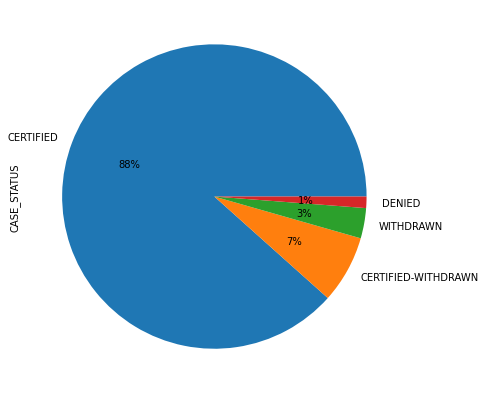

In [25]:
case_status = mainDF['CASE_STATUS'].value_counts()
plot = case_status.plot.pie(subplots=True, autopct='%1.0f%%', figsize=(75, 7))

Apparently, Denial rate is approx. 1%. of the total applications made and Certified rate is around 88% of the total applications made.

6. How many applications were made for a Full time Jobs or a Part time Job. 

In [26]:
fulltimeDF=mainDF.dropna(subset = ["FULL_TIME_POSITION"])
fulltimeJobs = fulltimeDF[fulltimeDF.FULL_TIME_POSITION=='Y']
parttimeJobs = fulltimeDF[fulltimeDF.FULL_TIME_POSITION=='N']
print("Out of the total "+ str(fulltimeDF.shape[0]) +" applications Fulltime / Partime Jobs data available, "+ str(fulltimeJobs.shape[0]) +" applications were for fulltime Jobs and "+ str(parttimeJobs.shape[0]) + " applications were for parttime Jobs")

Out of the total 2504647 applications Fulltime / Partime Jobs data available, 2453547 applications were for fulltime Jobs and 51100 applications were for parttime Jobs


There are around 2% H1B petitions done for Part Time Jobs.  

7. Top 10 employer with largest number of applications

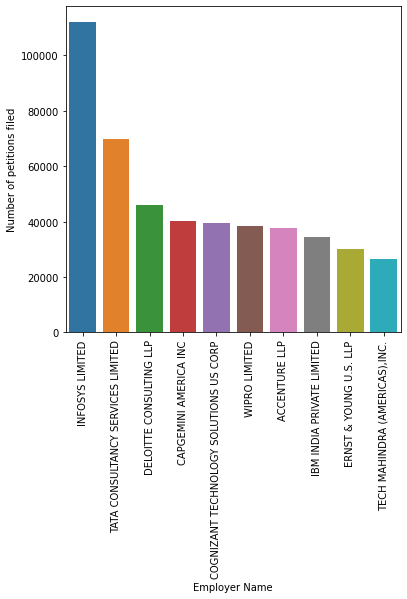

In [27]:
companies = mainDF['EMPLOYER_NAME'].value_counts().nlargest(10)
plt.figure(figsize=(6, 6))
sns.barplot(x=companies.index, y=companies.values)
plt.xlabel('Employer Name')
plt.ylabel('Number of petitions filed')
plt.xticks(rotation='90')
plt.show()

Infosys Limited and Tata Consultancy Services Limited are the highest petition filers based on past 5 years data.

8. Top 10 Highest paying employers and their respective Job Titles.

         PREVAILING_WAGE  ...                                     JOB_TITLE
450337         9110400.0  ...                             SOFTWARE ENGINEER
302062         8490600.0  ...                              DEV/OPS ENGINEER
253679         1144000.0  ...         SENIOR BACKEND ENGINEER - AD PLATFORM
1606779        1112218.0  ...  SENIOR CONSULTANT (SENIOR SOFTWARE ENGINEER)
1613081        1092533.0  ...                              PROCESS ENGINEER
1353255        1000942.0  ...                      SOFTWARE DESIGN ENGINEER
1675082         976656.0  ...                            SENIOR QA ENGINEER
1665643         969280.0  ...                    SYSTEMS SOFTWARE DEVELOPER
1786989         896150.0  ...                CLOUD PATH AWS PROGRAM MANAGER
520067          880005.0  ...                      SENIOR SOFTWARE ENGINEER

[10 rows x 3 columns]


<Figure size 864x720 with 0 Axes>

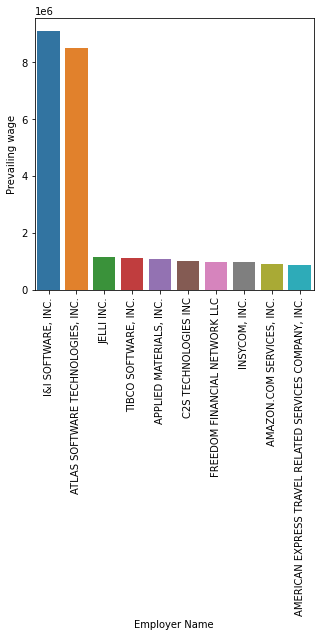

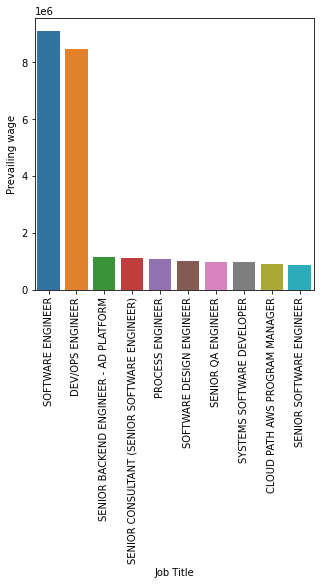

In [28]:
fig = plt.figure(figsize=(12,10), facecolor='white')
#The top three values for prevailing wages are very high indicating some outlier occurence in the data.
#Hence ignoring the top 3 values.
company_highsalary = mainDF.sort_values(by='PREVAILING_WAGE', ascending=False).head(13)
company_highsalary = company_highsalary[['PREVAILING_WAGE','EMPLOYER_NAME','JOB_TITLE']]
company_highsalary = company_highsalary.iloc[3:]
print(company_highsalary)
plt.figure(figsize=(5, 5))
sns.barplot(x=company_highsalary.EMPLOYER_NAME, y=company_highsalary.PREVAILING_WAGE)
plt.xlabel('Employer Name')
plt.ylabel('Prevailing wage')
plt.xticks(rotation='90')
plt.figure(figsize=(5, 5))
sns.barplot(x=company_highsalary.JOB_TITLE, y=company_highsalary.PREVAILING_WAGE)
plt.xlabel('Job Title')
plt.ylabel('Prevailing wage')
plt.xticks(rotation='90')
plt.show()

The highest paying jobs are amongst the technology companies with the Jobs in Software Engineering domain. The highest petition filing employers are considerably different from highest paying employers.

9. Top 10 cities with highest number of petitions filed.

NEW YORK           151721
PLANO              137704
CHICAGO            114441
ROCKVILLE           74134
PHILADELPHIA        69801
EDISON              68428
DURHAM              56541
COLLEGE STATION     55366
SAN FRANCISCO       55206
HOUSTON             50035
Name: EMPLOYER_CITY, dtype: int64


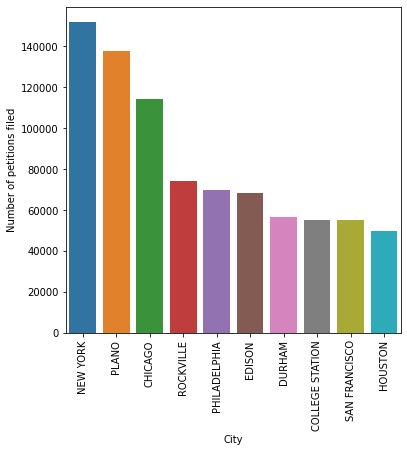

In [29]:
top_cities = mainDF['EMPLOYER_CITY'].value_counts()[:10]
print(top_cities)
plt.figure(figsize=(6, 6))
sns.barplot(x=top_cities.index, y=top_cities.values)
plt.xlabel('City')
plt.ylabel('Number of petitions filed')
plt.xticks(rotation='90')
plt.show()

As seen in Question 3, the entire New York State has 214526 application in past 5 years, out of which NewYork City accounts for 114008 applications in the same tenure.

10. Top 10 most trending Jobs in the petitions filed past 5 years

In [30]:
popular_job=mainDF['JOB_TITLE'].value_counts().nlargest(10)
popular_job

PROGRAMMER ANALYST          172841
SOFTWARE ENGINEER           150752
SOFTWARE DEVELOPER          109413
SYSTEMS ANALYST              44126
COMPUTER PROGRAMMER          37295
SENIOR SOFTWARE ENGINEER     35775
BUSINESS ANALYST             34016
COMPUTER SYSTEMS ANALYST     26338
DEVELOPER                    26205
ASSISTANT PROFESSOR          25299
Name: JOB_TITLE, dtype: int64

The Job Titles PROGRAMMER ANALYST, SOFTWARE ENGINEER and SOFTWARE DEVELOPER are the top 3 most trending jobs seen among the H1B petitions filed.

11. Most common job titles which are DENIED.

In [31]:
selectedStates = mainDF[(mainDF['CASE_STATUS'] == 'DENIED')].groupby(['JOB_TITLE']).count()['CASE_NUMBER']
selectedStates.nlargest(10)

JOB_TITLE
PROGRAMMER ANALYST          1493
SOFTWARE ENGINEER           1302
SOFTWARE DEVELOPER           912
ACCOUNTANT                   446
COMPUTER PROGRAMMER          394
BUSINESS ANALYST             339
SENIOR SOFTWARE ENGINEER     331
COMPUTER SYSTEMS ANALYST     318
SYSTEMS ANALYST              317
ASSISTANT PROFESSOR          301
Name: CASE_NUMBER, dtype: int64

The Job titles with the highest number of applications are in a way the top jobs with the high rate of Denied. So as such there doesn't seem any good linkage between a specific Job_Title and case getting 'DENIED'. A specific Job_Title ACCOUNTANT seen with some good amount of Denied, however ACCOUNTANT Job_Title is not seen amongst the top 10 trending, Job_Titles giving some hints about the high denial Ratio However, not that conclusive.                 

12. Understanding the relation between Denied Cases and the job being Full Time / Part Time 

In [32]:
fulltimeDF = mainDF[mainDF.CASE_STATUS=='DENIED']
print("Total denied cases : "+str(fulltimeDF.shape[0]))
fulltimeDF=fulltimeDF.dropna(subset = ["FULL_TIME_POSITION"])
print("Total denied cases with data about Full Time / Part Time Jobs : "+str(fulltimeDF.shape[0]))
fulltimeJobs = fulltimeDF[fulltimeDF.FULL_TIME_POSITION=='Y']
print("Total denied cases with Full Time Jobs : "+str(fulltimeJobs.shape[0]))
parttimeJobs = fulltimeDF[fulltimeDF.FULL_TIME_POSITION=='N']
print("Total denied cases with Part Time Jobs : "+str(parttimeJobs.shape[0]))

Total denied cases : 38060
Total denied cases with data about Full Time / Part Time Jobs : 29854
Total denied cases with Full Time Jobs : 28158
Total denied cases with Part Time Jobs : 1696


There is no conclusive resembalance between the cases getting denied and job being full time or part time.

13. Understanding the trend of the Software Engineer Jobs among all the applications past 5 years. 

In [33]:
SoftwareEngg = mainDF[['JOB_TITLE','Year']][mainDF['JOB_TITLE'] == "SOFTWARE ENGINEER"].groupby('Year').count()['JOB_TITLE']
SoftwareEngg

Year
2015    26899
2016    30287
2017    27636
2018    31626
2019    34304
Name: JOB_TITLE, dtype: int64

Software Engineer Job applications have increased by 27.52% from 2015 to 2019. As impacted by the reduction in the overall applications done in the year 2017, SOFTWARE ENGINEER Job Title applications also saw a reduction in terms of H1B petition applications in the year 2017.

14. Understanding the trend of the Data Scientist Jobs among all the applications past 5 years. 

In [34]:
DataScientist = mainDF[['JOB_TITLE','Year']][mainDF['JOB_TITLE'] == "DATA SCIENTIST"].groupby('Year').count()['JOB_TITLE']
DataScientist

Year
2015     564
2016     897
2017    1296
2018    2237
2019    2678
Name: JOB_TITLE, dtype: int64

Data Scientist Job applications have increased by 374.82% from 2015 to 2019.  Reason might be that the jobs are in increasing demand in the past 5 years and along with this increase in demand, the need of foreign labour is also seeing a rise.

15. SOFTWARE ENGINEER jobs in California in 2019 with the minimum yearly wage. 

In [43]:
SE_CA_2019 = mainDF[['WAGE_FROM','WAGE_TO']][(mainDF['JOB_TITLE'] == 'SOFTWARE ENGINEER') & (mainDF['Year'] == 2019) & (mainDF['EMPLOYER_STATE'] == 'CA')]
SE_CA_2019.min()

WAGE_FROM    60000.0
dtype: float64

Minimum yearly wage that a Software Engineer gets in the state of California is 60000.

Let's check the same for Data Scientist.

In [45]:
DS_CA_2019= mainDF[['WAGE_FROM','WAGE_TO']][(mainDF['JOB_TITLE'] == 'DATA SCIENTIST') & (mainDF['Year'] == 2019) & (mainDF['EMPLOYER_STATE'] == 'CA')]
DS_CA_2019.min()

WAGE_FROM    68544.0
dtype: float64

Minimum yearly wage that a Data Scientist gets in the state of California is 68544.0

16. Prediction for the Software Engineer job petitions

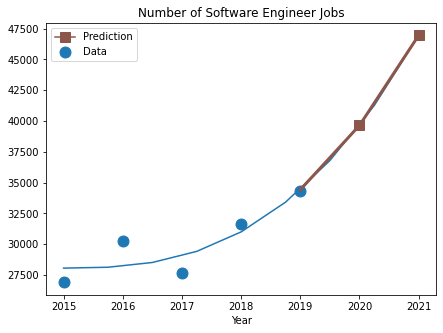

In [46]:
sej = mainDF[['JOB_TITLE','Year']][mainDF['JOB_TITLE'] == "SOFTWARE ENGINEER"].groupby('Year').count()['JOB_TITLE']
X = np.array(sej.index)
Y = sej.values
def func(x, a, b, c):
    return a*np.power(x-2015,b)+c

popt, pcov = curve_fit(func, X, Y)
X1 = np.linspace(2015,2021,9)
X2 = np.linspace(2019,2021,3)
X3 = np.linspace(2020,2021,2)
fig = plt.figure(figsize=(7,5))
plt.scatter(list(sej.index), sej.values, c='C0', marker='o', s=120, label='Data')
plt.plot(X1, func(X1,*popt), color='C0', label='')
plt.plot(X2, func(X2,*popt), color='C5', linewidth=3, marker='s', markersize=1)
plt.plot(X3, func(X3,*popt), color='C5', marker='s', markersize=10, label='Prediction')
plt.legend()
plt.title('Number of Software Engineer Jobs')
plt.xlabel('Year')
plt.show()

There will be around 47500 petitions for Software Engineer in the year 2021. (Unless COVID-19 affects this model.)

18. Prediction for the Data Scientist Job petitions 

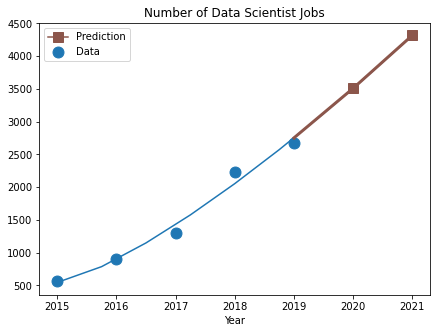

In [47]:
dsj = mainDF[['JOB_TITLE','Year']][mainDF['JOB_TITLE'] == "DATA SCIENTIST"].groupby('Year').count()['JOB_TITLE']
X = np.array(dsj.index)
Y = dsj.values
def func(x, a, b, c):
    return a*np.power(x-2015,b)+c

popt, pcov = curve_fit(func, X, Y)
X1 = np.linspace(2015,2021,9)
X2 = np.linspace(2019,2021,3)
X3 = np.linspace(2020,2021,2)
fig = plt.figure(figsize=(7,5))
plt.scatter(list(dsj.index), dsj.values, c='C0', marker='o', s=120, label='Data')
plt.plot(X1, func(X1,*popt), color='C0', label='')
plt.plot(X2, func(X2,*popt), color='C5', linewidth=3, marker='s', markersize=1)
plt.plot(X3, func(X3,*popt), color='C5', marker='s', markersize=10, label='Prediction')
plt.legend()
plt.title('Number of Data Scientist Jobs')
plt.xlabel('Year')
plt.show()

The prediction model tells us there will be almost 4500 Data Science job petitions in 2021. (Unless COVID-19 affects this model.)

95/100
Any overall conclusions?